In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  INFY


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INFY,INFY,INFY,INFY,INFY
Date,,,,,
2015-01-02,5.948074,6.011471,5.903324,6.009606,13401600
2015-01-05,5.873491,5.918242,5.843658,5.905190,10076400
2015-01-06,5.832470,5.910784,5.739240,5.852981,13290800
2015-01-07,5.955534,6.002149,5.851116,5.854845,23202800
2015-01-08,5.987232,6.026389,5.968586,5.976044,14087200


In [12]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, INFY)   2744 non-null   float64
 1   (High, INFY)    2744 non-null   float64
 2   (Low, INFY)     2744 non-null   float64
 3   (Open, INFY)    2744 non-null   float64
 4   (Volume, INFY)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [13]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [15]:
pred1[0]

16.356608261307205

In [16]:
print(y_test)

Date
2023-09-25    16.048532
2023-09-26    16.206511
2023-09-27    15.760457
2023-09-28    15.899849
2023-09-29    15.964899
                ...    
2025-11-20    17.700001
2025-11-21    17.270000
2025-11-24    17.280001
2025-11-25    17.420000
2025-11-26    17.480000
Name: Target, Length: 547, dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  0.10753610472076543
Root Mean Squared Error:  0.32792698077585114
R2 Score:  0.9769377225617727


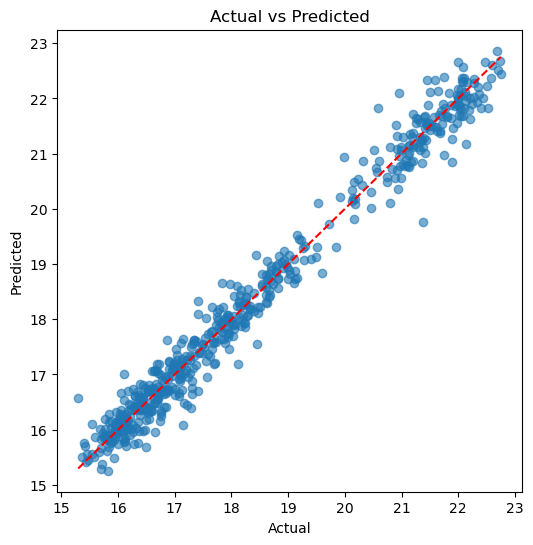

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [19]:
import joblib 
joblib.dump(lr, "INFY.pkl")
model = joblib.load("INFY.pkl")